## Discretization is the process through which we can transform continuous variables, models or functions into a discrete form. We do this by creating a set of contiguous intervals (or bins) that go across the range of our desired variable/model/function.

## Impot The Libraries

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

## Data Analysis and Preprocessing 

In [20]:
df = pd.read_csv("HCV-Egy-Data.csv")
df

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3


In [21]:
Disc_criteria = pd.read_csv("Discretization-Criteria.csv")
Disc_criteria.head(20)

,Feature Names,Feature Values,Discretization (Items)
0,Age,32:61,"[0; 32], ]32; 37], ]37; 42],]42; 47], ]47; 52]..."
1,Gender,"Male,Female","[Male], [Female]"
2,BMI(Body Mass Index),22:35,"[0; 18:5[ [18:5; 25[, [25; 30[, [30; 35[, [35;..."
3,Fever,"Absent, Present","[Absent], [Present] -"
4,Nausea/Vomiting,"Absent, Present","[Absent], [Present] -"
5,Headache,"Absent, Present","[Absent], [Present] -"
6,Diarrhea,"Absent, Present","[Absent], [Present] -"
7,Fatigue,"Absent, Present","[Absent], [Present] -"
8,Bone ache,"Absent, Present","[Absent], [Present] -"
9,Jaundice,"Absent, Present","[Absent], [Present] -"


In [22]:
df.isnull().sum().values.any()

False

## Distribution of Age

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


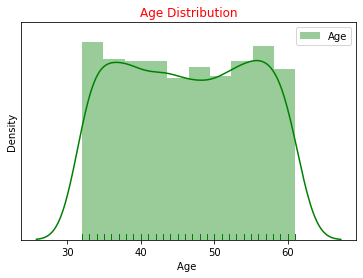

In [23]:
sns.distplot(df['Age '],bins=10,label="Age",color="green",rug=True,)
plt.yticks([])
plt.title("Age Distribution", color = 'red')
plt.legend()
plt.show() 

No handles with labels found to put in legend.


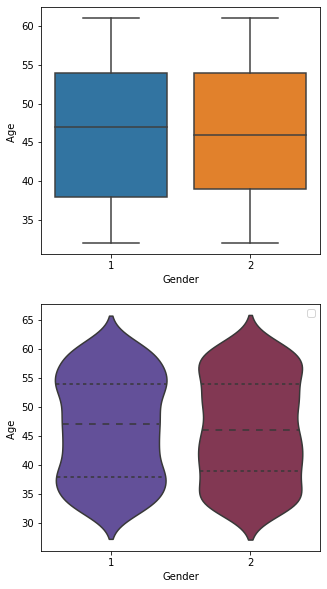

In [24]:
fig,axis=plt.subplots(2,1,figsize=(5,10))

sns.boxplot(x=df["Gender"],y=df['Age '],ax=axis[0])
sns.violinplot(x=df["Gender"],y=df['Age '],inner="quartile",bandwidth=0.2, ax=axis[1],palette='twilight')

plt.legend(bbox_to_anchor=(1,1))
plt.show()

## Performing Discretization on Dataset

In [25]:
df['Age '] = pd.cut(x = df['Age '], bins = [0, 32, 37, 42, 47, 52, 57, 62])
df['Age ']

0       (52, 57]
1       (42, 47]
2       (52, 57]
3       (47, 52]
4       (57, 62]
          ...   
1380    (42, 47]
1381    (52, 57]
1382    (37, 42]
1383    (47, 52]
1384    (52, 57]
Name: Age , Length: 1385, dtype: category
Categories (7, interval[int64]): [(0, 32] < (32, 37] < (37, 42] < (42, 47] < (47, 52] < (52, 57] < (57, 62]]

In [26]:
df['Gender'].isnull().sum() 

0

In [27]:
df['Gender'] = df['Gender'].map({1:'Male', 2:'Female'})
df['Gender'].head()

0      Male
1      Male
2      Male
3    Female
4      Male
Name: Gender, dtype: object

In [28]:
df['BMI'] = pd.cut(df['BMI'], [0,18.5, 25, 30, 35, 40], right= False)
df['BMI'].head() 

0    [35.0, 40.0)
1    [25.0, 30.0)
2    [30.0, 35.0)
3    [30.0, 35.0)
4    [30.0, 35.0)
Name: BMI, dtype: category
Categories (5, interval[float64]): [[0.0, 18.5) < [18.5, 25.0) < [25.0, 30.0) < [30.0, 35.0) < [35.0, 40.0)]

In [29]:
for i in df.columns[3:10]:
    df[i] = df[i].map({1:'Absent', 2:'Present'}) 

In [30]:
df.iloc[:, 3:10] 

,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain
0,Present,Absent,Absent,Absent,Present,Present,Present
1,Absent,Present,Present,Absent,Present,Present,Absent
2,Present,Present,Present,Present,Absent,Absent,Absent
3,Absent,Present,Absent,Present,Absent,Present,Absent
4,Absent,Absent,Present,Absent,Present,Present,Present
...,...,...,...,...,...,...,...
1380,Absent,Present,Present,Present,Absent,Absent,Absent
1381,Absent,Present,Present,Absent,Absent,Absent,Absent
1382,Present,Present,Absent,Absent,Absent,Present,Absent
1383,Present,Absent,Absent,Present,Present,Present,Absent


In [31]:
df['WBC'] = pd.cut(df.WBC, [0,4000, 11000, 12101], include_lowest = True, right = False,) 
df['WBC']

0        [4000.0, 11000.0)
1                      NaN
2        [4000.0, 11000.0)
3        [4000.0, 11000.0)
4            [0.0, 4000.0)
               ...        
1380     [4000.0, 11000.0)
1381     [4000.0, 11000.0)
1382     [4000.0, 11000.0)
1383     [4000.0, 11000.0)
1384    [11000.0, 12101.0)
Name: WBC, Length: 1385, dtype: category
Categories (3, interval[int64]): [[0, 4000) < [4000, 11000) < [11000, 12101)]

In [32]:
df['RBC'] = pd.cut(df.RBC, [0, 3000000, 5000000,5018451 ], include_lowest = True, right = False)
df['RBC']

0       [3000000, 5000000)
1       [3000000, 5000000)
2       [3000000, 5000000)
3       [3000000, 5000000)
4       [3000000, 5000000)
               ...        
1380    [3000000, 5000000)
1381    [3000000, 5000000)
1382    [3000000, 5000000)
1383    [3000000, 5000000)
1384    [3000000, 5000000)
Name: RBC, Length: 1385, dtype: category
Categories (3, interval[int64]): [[0, 3000000) < [3000000, 5000000) < [5000000, 5018451)]

In [33]:
for i in range(0,1385):
    if(df['Gender'][i] == 'Male'):
        if(df.loc[i, 'HGB'] >= 2 and df.loc[i,'HGB']<14):
            df.loc[i, 'HGB'] = pd.Interval(left = 2, right = 14, closed = 'left')
        elif(df.loc[i,'HGB']>= 14 and df.loc[i,'HGB'] <= 17.5):
            df.loc[i,'HGB'] = pd.Interval(left = 14, right = 17.5, closed = 'both')
        elif(df.loc[i,'HGB'] > 17.5 and df.loc[i,'HGB'] <=20):
            df.loc[i,'HGB'] = pd.Interval(left= 17.5, right = 20, closed = 'right')
    else:
        if(df.loc[i,'HGB'] >= 2 and df.loc[i,'HGB']<12.5):
            df.loc[i,'HGB'] = pd.Interval(left = 2, right = 12.5, closed = 'left')
        elif(df.loc[i,'HGB'] >=12.5 and df.loc[i,'HGB'] <= 15.3):
            df.loc[i,'HGB'] = pd.Interval(left = 12.5, right = 15.3, closed = 'both')
        elif(df.loc[i,'HGB'] >15.3 and df.loc[i,'HGB'] <=20):
            df.loc[i,'HGB'] = pd.Interval(left = 15.3, right = 20, closed = 'right')
            

In [34]:
print(df['HGB'])

0         [14, 17.5]
1            [2, 14)
2            [2, 14)
3          [2, 12.5)
4            [2, 14)
            ...     
1380      [14, 17.5]
1381         [2, 14)
1382      [14, 17.5]
1383         [2, 14)
1384    [12.5, 15.3]
Name: HGB, Length: 1385, dtype: object


In [35]:
df['Plat'] = pd.cut(df['Plat'], bins = [93013, 100000, 226465],include_lowest = True, right = False)
print(df['Plat'])

0       [100000, 226465)
1       [100000, 226465)
2       [100000, 226465)
3       [100000, 226465)
4       [100000, 226465)
              ...       
1380    [100000, 226465)
1381    [100000, 226465)
1382    [100000, 226465)
1383    [100000, 226465)
1384    [100000, 226465)
Name: Plat, Length: 1385, dtype: category
Categories (2, interval[int64]): [[93013, 100000) < [100000, 226465)]


In [36]:
for i in range(0, 1385):
    for j in range(14, 22):
        if df.iloc[i,j] >= 0 and df.iloc[i, j] < 20:
            df.iloc[i,j] = pd.Interval(left = 0, right = 20, closed = 'left')
        elif df.iloc[i, j] >= 20 and df.iloc[i, j] <= 40: 
            df.iloc[i, j] = pd.Interval(left = 20, right = 40, closed = 'both')
        elif df.iloc[i, j] > 40 and df.iloc[i, j] <= 128:
            df.iloc[i, j] = pd.Interval(left = 40, right = 128, closed = 'right') 
print(df.iloc[0:5, 14:22])

       AST 1      ALT 1       ALT4     ALT 12     ALT 24     ALT 36  \
0  (40, 128]  (40, 128]  (40, 128]  (40, 128]  (40, 128]    [0, 20)   
1  (40, 128]  (40, 128]  (40, 128]  (40, 128]  (40, 128]  (40, 128]   
2  (40, 128]  (40, 128]  (40, 128]  (40, 128]  (40, 128]    [0, 20)   
3  (40, 128]  (40, 128]  (40, 128]  (40, 128]  (40, 128]  (40, 128]   
4  (40, 128]  (40, 128]  (40, 128]  (40, 128]  (40, 128]  (40, 128]   

      ALT 48 ALT after 24 w  
0    [0, 20)        [0, 20)  
1  (40, 128]      (40, 128]  
2    [0, 20)        [0, 20)  
3  (40, 128]       [20, 40]  
4  (40, 128]       [20, 40]  


In [37]:
df['RNA Base'] = pd.cut(df['RNA Base'] , [0, 5, 1201086]) 
df['RNA 4'] = pd.cut(df['RNA 4'], [0, 5, 1201715]) 
df['RNA 12'] = pd.cut(df['RNA 12'], [ 0, 5,3731527])
df['RNA EOT'] = pd.cut(df['RNA EOT'], [0, 5, 808450])
df['RNA EF'] = pd.cut(df['RNA EF'], [0, 5, 808450])
print(df.iloc[:, 22:27])

          RNA Base         RNA 4        RNA 12      RNA EOT       RNA EF
0     (5, 1201086]  (5, 1201715]  (5, 3731527]       (0, 5]       (0, 5]
1     (5, 1201086]  (5, 1201715]  (5, 3731527]  (5, 808450]  (5, 808450]
2     (5, 1201086]  (5, 1201715]        (0, 5]  (5, 808450]  (5, 808450]
3     (5, 1201086]  (5, 1201715]  (5, 3731527]  (5, 808450]  (5, 808450]
4     (5, 1201086]  (5, 1201715]  (5, 3731527]  (5, 808450]  (5, 808450]
...            ...           ...           ...          ...          ...
1380  (5, 1201086]  (5, 1201715]        (0, 5]       (0, 5]       (0, 5]
1381  (5, 1201086]  (5, 1201715]  (5, 3731527]  (5, 808450]  (5, 808450]
1382  (5, 1201086]  (5, 1201715]  (5, 3731527]  (5, 808450]  (5, 808450]
1383  (5, 1201086]  (5, 1201715]  (5, 3731527]  (5, 808450]  (5, 808450]
1384  (5, 1201086]  (5, 1201715]        (0, 5]       (0, 5]       (0, 5]

[1385 rows x 5 columns]


In [38]:
# df['Baseline histological Grading'] = pd.cut(df['Baseline histological Grading'], bins = [i for i in range(0, 17)], labels = [str([i]) for i in range(1, 17)], right = True)

In [39]:
df['Baseline histological Grading'].dtype
df['Baseline histological Grading'].head()

0    13
1     4
2     4
3    10
4    11
Name: Baseline histological Grading, dtype: int64

In [40]:
df['Baselinehistological staging'].head()

0    2
1    2
2    4
3    3
4    1
Name: Baselinehistological staging, dtype: int64

In [41]:
df['Baselinehistological staging'] = pd.cut(df['Baselinehistological staging'],bins = [i for i in range(0, 6)], labels = ['[No Fibrosis]', '[Portal Fibrosis]', '[Few Septa]',
                                                                                       '[Many Septa]', '[Cirrhosis]'], include_lowest = True, right = False)  
df['Baselinehistological staging'].astype('category')
df['Baselinehistological staging'].head()

0          [Few Septa]
1          [Few Septa]
2          [Cirrhosis]
3         [Many Septa]
4    [Portal Fibrosis]
Name: Baselinehistological staging, dtype: category
Categories (5, object): ['[No Fibrosis]' < '[Portal Fibrosis]' < '[Few Septa]' < '[Many Septa]' < '[Cirrhosis]']

## Descritized Dataset

In [42]:
df

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,"(52, 57]",Male,"[35.0, 40.0)",Present,Absent,Absent,Absent,Present,Present,Present,...,"[0, 20)","[0, 20)","[0, 20)","(5, 1201086]","(5, 1201715]","(5, 3731527]","(0, 5]","(0, 5]",13,[Few Septa]
1,"(42, 47]",Male,"[25.0, 30.0)",Absent,Present,Present,Absent,Present,Present,Absent,...,"(40, 128]","(40, 128]","(40, 128]","(5, 1201086]","(5, 1201715]","(5, 3731527]","(5, 808450]","(5, 808450]",4,[Few Septa]
2,"(52, 57]",Male,"[30.0, 35.0)",Present,Present,Present,Present,Absent,Absent,Absent,...,"[0, 20)","[0, 20)","[0, 20)","(5, 1201086]","(5, 1201715]","(0, 5]","(5, 808450]","(5, 808450]",4,[Cirrhosis]
3,"(47, 52]",Female,"[30.0, 35.0)",Absent,Present,Absent,Present,Absent,Present,Absent,...,"(40, 128]","(40, 128]","[20, 40]","(5, 1201086]","(5, 1201715]","(5, 3731527]","(5, 808450]","(5, 808450]",10,[Many Septa]
4,"(57, 62]",Male,"[30.0, 35.0)",Absent,Absent,Present,Absent,Present,Present,Present,...,"(40, 128]","(40, 128]","[20, 40]","(5, 1201086]","(5, 1201715]","(5, 3731527]","(5, 808450]","(5, 808450]",11,[Portal Fibrosis]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,"(42, 47]",Male,"[25.0, 30.0)",Absent,Present,Present,Present,Absent,Absent,Absent,...,"(40, 128]","(40, 128]","(40, 128]","(5, 1201086]","(5, 1201715]","(0, 5]","(0, 5]","(0, 5]",15,[Cirrhosis]
1381,"(52, 57]",Male,"[30.0, 35.0)",Absent,Present,Present,Absent,Absent,Absent,Absent,...,"(40, 128]","(40, 128]","(40, 128]","(5, 1201086]","(5, 1201715]","(5, 3731527]","(5, 808450]","(5, 808450]",10,[Few Septa]
1382,"(37, 42]",Male,"[25.0, 30.0)",Present,Present,Absent,Absent,Absent,Present,Absent,...,"(40, 128]","[20, 40]","[20, 40]","(5, 1201086]","(5, 1201715]","(5, 3731527]","(5, 808450]","(5, 808450]",6,[Few Septa]
1383,"(47, 52]",Male,"[25.0, 30.0)",Present,Absent,Absent,Present,Present,Present,Absent,...,"(40, 128]","(40, 128]","(40, 128]","(5, 1201086]","(5, 1201715]","(5, 3731527]","(5, 808450]","(5, 808450]",15,[Many Septa]


In [43]:
import pandas as pd
data = pd.read_csv("HCV-Egy-Data.csv")
data

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3


In [44]:
data.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

## Correlation between indepenedent variables

In [45]:
corr = data.iloc[:,0:28].corr().round(2)
corr

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
Age,1.00,-0.01,-0.03,-0.02,-0.03,0.02,0.04,-0.01,0.01,-0.01,...,0.00,-0.01,0.03,0.00,0.02,-0.01,0.00,-0.05,-0.03,-0.04
Gender,-0.01,1.00,0.01,0.02,-0.04,-0.02,0.02,0.05,0.00,-0.03,...,-0.02,0.01,-0.02,0.01,-0.01,-0.02,-0.03,0.04,-0.02,0.01
BMI,-0.03,0.01,1.00,-0.02,0.01,-0.01,-0.03,-0.01,-0.07,0.01,...,0.01,-0.03,-0.01,-0.02,-0.02,0.04,-0.01,-0.02,-0.04,-0.02
Fever,-0.02,0.02,-0.02,1.00,-0.01,0.02,-0.02,-0.00,-0.01,-0.02,...,-0.05,-0.01,0.00,0.00,-0.00,0.00,0.02,0.02,-0.01,-0.03
Nausea/Vomting,-0.03,-0.04,0.01,-0.01,1.00,0.02,0.01,-0.03,0.00,-0.05,...,0.04,0.02,-0.04,0.01,0.01,-0.03,-0.01,0.01,0.02,-0.06
Headache,0.02,-0.02,-0.01,0.02,0.02,1.00,0.02,-0.02,0.01,0.03,...,0.01,0.02,-0.00,-0.00,0.02,-0.04,0.01,-0.01,-0.01,-0.01
Diarrhea,0.04,0.02,-0.03,-0.02,0.01,0.02,1.00,-0.03,-0.02,0.02,...,-0.02,0.01,-0.02,0.00,0.02,-0.00,-0.01,0.02,0.04,0.03
Fatigue & generalized bone ache,-0.01,0.05,-0.01,-0.00,-0.03,-0.02,-0.03,1.00,0.01,0.04,...,0.00,0.02,-0.01,0.04,-0.01,-0.05,0.03,0.01,0.01,-0.02
Jaundice,0.01,0.00,-0.07,-0.01,0.00,0.01,-0.02,0.01,1.00,-0.03,...,-0.01,0.01,0.02,-0.02,0.03,-0.01,0.03,0.04,0.02,-0.01
Epigastric pain,-0.01,-0.03,0.01,-0.02,-0.05,0.03,0.02,0.04,-0.03,1.00,...,-0.02,0.03,0.00,0.03,0.00,0.01,0.03,0.05,0.08,-0.01


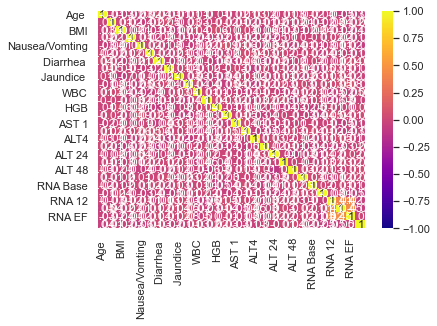

In [46]:
import seaborn as sns
sns.set()
sns.heatmap(data = corr,
           vmin = -1,
           vmax = 1,
           annot = True, # to show the coefficent values 
           cmap = 'plasma',); 

## Correlation with target variable, Baseline Histological staging

In [47]:
from scipy.stats import pearsonr
for i in range(28):
    x = data.iloc[:,i]
    corr = data.iloc[:, 28]
    corr, p_value = pearsonr(x, corr)
    print(i, corr)

0 -0.019599168581734612
1 0.011955338158832539
2 -0.057258857137978215
3 -0.03097517616405608
4 0.05490637369148432
5 -0.0019960578906393113
6 -0.005639269272453382
7 0.014562612305633167
8 0.02021856462284308
9 -0.05210957468088374
10 0.017945003813039775
11 0.009622816886339498
12 0.002752465488484568
13 -0.01728363920560019
14 -0.02512596175522861
15 0.03686657735468361
16 -0.014997008378578276
17 0.0008088869926099231
18 -0.0048880393136866065
19 -0.006429919665578509
20 -0.013533125126737336
21 0.033918723245544055
22 0.02941055765233501
23 -0.032945848571992516
24 0.03444872963243064
25 -0.01748612533162973
26 0.030518759491111356
27 -0.04707159045869408


In [48]:
temp = data.columns.values
temp1 = [1,4,7,8,10, 11, 12,15,21,22, 24, 26, 27, 28]
for i in temp1:
    print(temp[i])

Gender
Nausea/Vomting
Fatigue & generalized bone ache 
Jaundice 
WBC
RBC
HGB
ALT 1
ALT after 24 w
RNA Base
RNA 12
RNA EF
Baseline histological Grading
Baselinehistological staging


In [49]:
col = ['Gender', 'Nausea/Vomting', 'Fatigue & generalized bone ache ', 'Jaundice ', 'WBC', 'RBC', 'HGB', 'ALT 1', 'ALT after 24 w', 'RNA Base', 'RNA 12', 'RNA EF', 'Baseline histological Grading', 'Baselinehistological staging']

In [50]:
df1 = data[col]
df1

,Gender,Nausea/Vomting,Fatigue & generalized bone ache,Jaundice,WBC,RBC,HGB,ALT 1,ALT after 24 w,RNA Base,RNA 12,RNA EF,Baseline histological Grading,Baselinehistological staging
0,1,1,2,2,7425,4248807.0,14,84,5,655330,288194,5,13,2
1,1,2,2,2,12101,4429425.0,10,123,44,40620,637056,31085,4,2
2,1,2,1,1,4178,4621191.0,12,49,5,571148,5,558829,4,4
3,2,2,1,2,6490,4794631.0,10,64,33,1041941,585688,582301,10,3
4,1,1,2,2,3661,4606375.0,11,104,30,660410,3731527,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,1,2,1,1,7044,4957174.0,15,59,45,387795,5,5,15,4
1381,1,2,1,1,6207,4636951.0,10,102,41,481378,393339,236273,10,2
1382,1,2,1,2,4913,4122038.0,14,93,24,612664,806109,160457,6,2
1383,1,1,2,2,7257,4241990.0,10,97,43,139872,515730,696074,15,3


In [51]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [52]:
X = df1.iloc[:, 0:13]
X = X.values
y = df1.iloc[:, 13]
y = y.values

## Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

### n_estimators = 100

In [54]:
random_clf = RandomForestClassifier(n_estimators = 100)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
random_clf = random_clf.fit(X_train, y_train)
y_pred = random_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.22021660649819494


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
random_clf = random_clf.fit(X_train, y_train)
y_pred = random_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.24519230769230768


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
random_clf = random_clf.fit(X_train, y_train)
y_pred = random_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.22382671480144403


### n_estimators = 1000

In [58]:
random_clf = RandomForestClassifier(n_estimators = 100)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
random_clf = random_clf.fit(X_train, y_train)
y_pred = random_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2003610108303249


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
random_clf = random_clf.fit(X_train, y_train)
y_pred = random_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.23076923076923078


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
random_clf = random_clf.fit(X_train, y_train)
y_pred = random_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.20216606498194944


## Decision tree classifier(CART)

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
clf = DecisionTreeClassifier()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.24548736462093862


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.24278846153846154


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted y ", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted y  [2 2 3 4 3 1 1 1 3 1 1 4 1 1 1 4 4 4 2 2 2 1 2 2 3 3 2 1 2 4 3 4 3 3 4 3 4
 3 4 4 2 2 4 3 1 4 1 3 2 2 1 2 4 3 3 4 1 4 1 4 3 1 1 3 3 2 3 2 4 3 2 4 4 2
 3 1 3 3 3 4 4 1 2 3 4 4 1 1 1 4 1 1 1 1 3 1 4 4 3 2 2 2 4 4 4 3 1 4 1 4 2
 4 3 4 1 1 2 1 4 3 1 4 2 1 2 2 2 4 4 4 4 1 3 4 2 4 1 1 3 3 4 1 1 1 2 3 1 4
 2 2 4 3 2 3 3 2 3 1 4 3 1 2 3 1 4 1 1 3 3 1 4 2 2 4 3 3 1 4 3 2 4 4 2 1 2
 2 4 2 1 2 3 2 1 2 3 3 2 4 3 4 1 3 3 3 3 3 2 2 2 3 3 2 4 3 2 4 1 3 3 4 4 4
 1 2 2 1 3 4 1 3 3 3 1 1 1 4 4 2 3 2 4 4 2 4 1 2 2 3 1 1 1 2 4 3 3 4 2 1 1
 1 1 2 2 2 1 2 2 2 3 1 4 4 4 1 4 1 1]
Accuracy: 0.24187725631768953


## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logreg = LogisticRegression()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.24548736462093862


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.27884615384615385


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.23826714801444043


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Gaussian Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.4)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, y_pred))


Gaussian Naive Bayes model accuracy: 0.2545126353790614


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, y_pred))


Gaussian Naive Bayes model accuracy: 0.24519230769230768


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, y_pred))


Gaussian Naive Bayes model accuracy: 0.296028880866426


## Support Vector Machine

In [76]:
from sklearn import svm

In [77]:
clf_svm = svm.SVC(kernel = 'linear')
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4)
clf_svm = clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.26173285198555957


## Perceptron

In [79]:
from sklearn.linear_model import Perceptron

In [80]:
perception = Perceptron(max_iter = 5)
perception.fit(X_train, y_train)
y_pred = perception.predict(X_test)
print("Accuracy:", round(perception.score(X_train, y_train), 2))

Accuracy: 0.26


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


## Exploration

## Analyzing ALT Levels

### ALT(Alanine Aminotransferase) Test
#### The alanine aminotransferase (ALT) test is a blood test that checks for liver damage. Higher levels of ALT indicate Greater Liver Damage (reference:-

### Across Gender
#### Although there is not much variance between Male and Female ALT (mean) levels, both of them do drop after 24 Weeks showing improvement in Liver Conditions for both

### Across Age
#### Though there is variation in ALT (mean) levels amongst different age groups, all of them follow a general trend and drop together after 24 Weeks also showing improvement in Liver conditions

In [81]:
import pandas as pd
dataFrame = pd.read_csv("HCV-Egy-Data.csv")
dataFrame.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [82]:
dataFrame.iloc[:, 14:22]
time = [1, 4, 12, 24, 36, 48, '   ALT after 24 w']
male= []
female=[]
for i in range(15,22):
    male.append(dataFrame[dataFrame.iloc[:,1] == 1].iloc[:,i].mean())
    female.append(dataFrame[dataFrame.iloc[:,1] == 2].iloc[:,i].mean())

dict1 = {'time':time, 'MaleMeanALT': male, 'FemaleMeanALT':female}
dataFrame2 = pd.DataFrame(dict1)
dataFrame2

,time,MaleMeanALT,FemaleMeanALT
0,1,83.346535,84.510324
1,4,83.632249,83.169617
2,12,83.256011,83.775811
3,24,84.117397,83.283186
4,36,82.960396,83.281711
5,48,84.151344,83.085546
6,ALT after 24 w,33.367751,33.511799


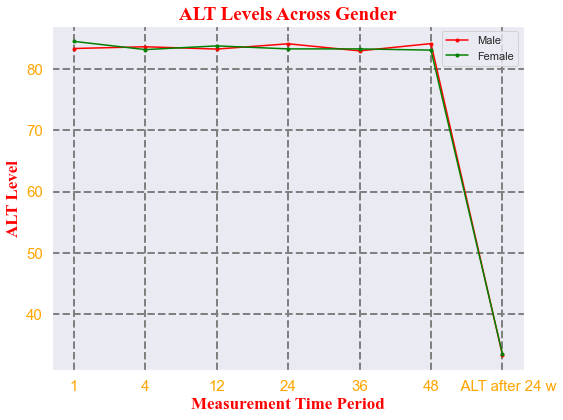

In [98]:
import numpy as np 
from matplotlib import pyplot as plt 
fig = plt.figure(figsize= (8,6))
ax = fig.add_subplot(111)
ax.plot(time,dataFrame2.MaleMeanALT, '.-', linewidth = 1.5, label = 'Male', color = 'red')
ax.plot(time,dataFrame2.FemaleMeanALT,'.-', linewidth = 1.5, label = 'Female', color = 'green')
ax.legend()
ax.grid(b = True, color='gray', linestyle='--', linewidth=2)
ax.set_title("ALT Levels Across Gender", fontname = 'Times New Roman', fontweight = 'bold', fontsize = 19, color = 'red')
ax.set_xlabel("Measurement Time Period",fontname = 'Times New Roman', fontweight ='bold', fontsize = 17, color= 'red', )
ax.set_ylabel("ALT Level",fontname = 'Times New Roman', fontweight ='bold', color = 'red', fontsize = 17)
ax.tick_params(axis= 'x', colors = 'orange', labelsize = 15, )
ax.tick_params(axis = 'y', colors = 'orange', labelsize = 15)
plt.tight_layout()


In [84]:
dataFrame['Age '] = pd.cut(x = dataFrame['Age '], bins = [0, 32, 37, 42, 47, 52, 57, 62])
dataFrame['Age ']

0       (52, 57]
1       (42, 47]
2       (52, 57]
3       (47, 52]
4       (57, 62]
          ...   
1380    (42, 47]
1381    (52, 57]
1382    (37, 42]
1383    (47, 52]
1384    (52, 57]
Name: Age , Length: 1385, dtype: category
Categories (7, interval[int64]): [(0, 32] < (32, 37] < (37, 42] < (42, 47] < (47, 52] < (52, 57] < (57, 62]]

In [85]:
dataFrame.iloc[:, 14:22]
time = [1, 4, 12, 24, 36, 48, '   ALT after 24 w']
l1, l2, l3, l4, l5,l6,l7 = [], [], [], [], [],[], [] 
i1 = pd.Interval(left= 0, right = 32, closed = 'right')
i2 = pd.Interval(left= 32, right = 37, closed = 'right')
i3 = pd.Interval(left = 37, right = 42, closed = 'right')
i4 = pd.Interval(left = 42, right = 47, closed = 'right')
i5 = pd.Interval(left = 47, right = 52, closed = 'right')
i6 = pd.Interval(left = 52, right = 57, closed = 'right')
i7 = pd.Interval(left = 57, right = 62, closed = 'right')
for i in range(15,22): 
    l1.append(dataFrame[dataFrame.iloc[:,0] == i1].iloc[:,i].mean())
    l2.append(dataFrame[dataFrame.iloc[:,0] == i2].iloc[:,i].mean()) 
    l3.append(dataFrame[dataFrame.iloc[:,0] == i3].iloc[:,i].mean()) 
    l4.append(dataFrame[dataFrame.iloc[:,0] == i4].iloc[:,i].mean()) 
    l5.append(dataFrame[dataFrame.iloc[:,0] == i5].iloc[:,i].mean()) 
    l6.append(dataFrame[dataFrame.iloc[:,0] == i6].iloc[:,i].mean()) 
    l7.append(dataFrame[dataFrame.iloc[:,0] == i7].iloc[:,i].mean()) 

dict2 = {'time':time, '(0, 32]': l1, '(32, 37]':l2, '(37, 42]':l3, '(42, 47]':l4, '(47, 52]':l5, '(52, 57]':l6, '(57, 62]':l7, }
dataFrame3 = pd.DataFrame(dict2)
dataFrame3

,time,"(0, 32]","(32, 37]","(37, 42]","(42, 47]","(47, 52]","(52, 57]","(57, 62]"
0,1,82.28,84.714286,84.722467,81.609649,84.028302,83.366255,85.800000
1,4,84.16,79.126531,84.837004,84.030702,87.259434,83.164609,82.211111
2,12,75.72,85.914286,82.541850,83.293860,80.750000,85.172840,84.905556
3,24,92.14,84.020408,82.013216,81.372807,82.202830,85.658436,85.183333
4,36,78.92,83.212245,84.440529,83.350877,83.896226,81.456790,83.516667
5,48,85.92,82.677551,81.290749,82.881579,85.471698,85.695473,83.227778
6,ALT after 24 w,33.62,33.134694,33.929515,33.657895,33.084906,33.238683,33.588889


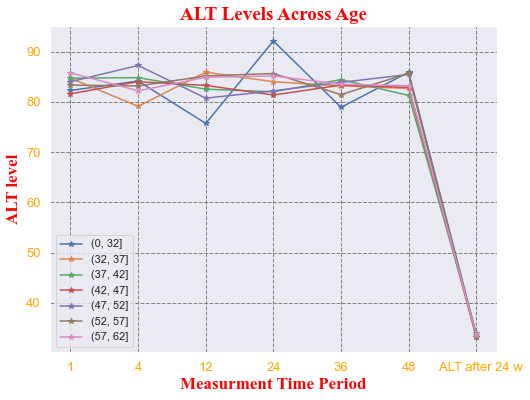

In [97]:
fig= plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.plot(time, dict2['(0, 32]'], '*-', linewidth = 1.5, label = '(0, 32]')
ax.plot(time, dict2['(32, 37]'], '*-', linewidth = 1.5, label = '(32, 37]')
ax.plot(time, dict2['(37, 42]'], '*-', linewidth = 1.5, label = '(37, 42]')
ax.plot(time, dict2['(42, 47]'], '*-', linewidth = 1.5, label = '(42, 47]')
ax.plot(time, dict2['(47, 52]'], '*-', linewidth = 1.5, label = '(47, 52]')
ax.plot(time, dict2['(52, 57]'], '*-', linewidth = 1.5, label = '(52, 57]')
ax.plot(time, dict2['(57, 62]'], '*-', linewidth = 1.5, label = '(57, 62]')
ax.grid(b = True,color = 'gray' ,linestyle = '--')
ax.legend()
ax.set_title("ALT Levels Across Age", color = 'red', fontname = 'Times New Roman', fontsize = '19', fontweight = 'bold')
ax.set_xlabel("Measurment Time Period", color = 'red', fontname = 'Times New Roman', fontsize = '17', fontweight = 'bold')
ax.set_ylabel("ALT level", color = 'red', fontname = 'Times New Roman', fontsize = '17', fontweight = 'bold')
ax.tick_params(axis = 'x', colors ='orange', labelsize = 13)
ax.tick_params(axis = 'y', colors = 'orange', labelsize = 13)